In [137]:
# Import our dependencies
import pandas as pd
from pathlib import Path
import sklearn as skl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [138]:
#import data
merged_df=pd.read_csv(Path('CV_cigaretee.csv'))

In [139]:
# define X (inputs) and y (target/output)
X = merged_df.drop(columns = ["Year-State","Major CV Disease-Overall"], axis=1)
y = merged_df[['Major CV Disease-Overall']]

In [140]:
X = np.array(X)
y = np.array(y)

In [141]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(305, 29) (102, 29) (305, 1) (102, 1)


In [142]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler instance
min_max_scaler = MinMaxScaler()

X_scaler = min_max_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization Attempt 1, More Neurons on Activation/Hidden Layers

In [143]:
# Create the Keras Sequential model
opt1_model = tf.keras.models.Sequential()

In [144]:
# Add our first Dense layer, including the input layer
opt1_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=29))

In [145]:
# Add our hidden layer layer, including the input layer
opt1_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

In [146]:
# Add the output layer that uses a probability activation function
opt1_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [147]:
# Check the structure of the Sequential model
opt1_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                300       
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 421 (1.64 KB)
Trainable params: 421 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
# Compile the Sequential model together and customize metrics
opt1_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Fit the model to the training data
fit_model = opt1_model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 228.4215 - mae: 13.4351 - val_loss: 12.2166 - val_mae: 3.2047
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 4.2136 - mae: 1.6595 - val_loss: 1.9114 - val_mae: 1.1137
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1789 - mae: 1.1070 - val_loss: 1.9009 - val_mae: 1.1039
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1452 - mae: 1.0866 - val_loss: 1.9250 - val_mae: 1.1090
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9889 - mae: 1.0653 - val_loss: 1.7184 - val_mae: 1.0596
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2411 - mae: 1.1637 - val_loss: 1.8749 - val_mae: 1.0979
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7980 - mae: 1.3255 - val_loss: 1.5091 - val_mae: 0.9809
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 3.162

10/10 [==============================] - 0s 3ms/step - loss: 0.3049 - mae: 0.4211 - val_loss: 0.6032 - val_mae: 0.6496
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6980 - mae: 0.6861 - val_loss: 0.2936 - val_mae: 0.4302
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4455 - mae: 0.5453 - val_loss: 1.2336 - val_mae: 1.0041
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4989 - mae: 0.5525 - val_loss: 0.2520 - val_mae: 0.4007
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6201 - mae: 0.6600 - val_loss: 0.4689 - val_mae: 0.5628
Epoch 68/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3244 - mae: 0.4394 - val_loss: 0.4649 - val_mae: 0.5678
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7160 - mae: 0.6722 - val_loss: 0.4416 - val_mae: 0.5430
Epoch 70/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4311 - mae: 0

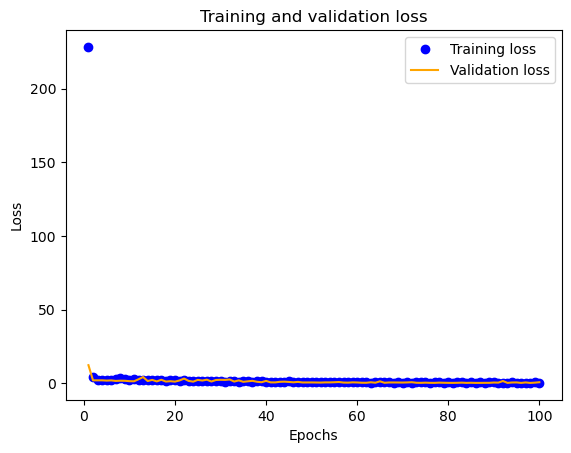

In [149]:
history_dict = fit_model.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


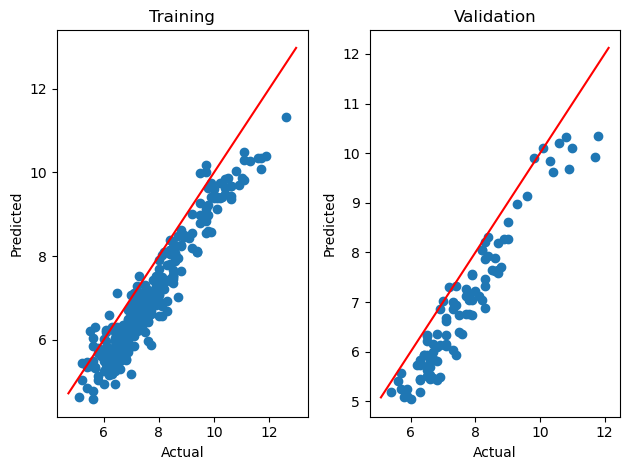

In [150]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=opt1_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=opt1_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [151]:
# metrics
pred = opt1_model.predict(X_test)
pred

trainpreds = opt1_model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

10/10 [==============================] - 0s 776us/step
0.6769008695883829
0.6935427637661206


## Optimization Attempt 2 (additional Hidden layer more epochs)

In [181]:
# define X (inputs) and y (target/output)
X = merged_df.drop(columns = ["Year-State","Major CV Disease-Overall"], axis=1)
y = merged_df[['Major CV Disease-Overall']]

In [182]:
X = np.array(X)
y = np.array(y)

In [183]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(305, 29) (102, 29) (305, 1) (102, 1)


In [184]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler instance
min_max_scaler2 = MinMaxScaler()

X_scaler2 = min_max_scaler2.fit(X_train)

# Scale the data
X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

In [185]:
# Create the Keras Sequential model
opt2_model = tf.keras.models.Sequential()

In [186]:
# Add our first Dense layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=29))

In [187]:
# Add our hidden layer layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [188]:
# Add our hidden layer layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [189]:
# Add the output layer that uses a probability activation function
opt2_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [190]:
# Check the structure of the Sequential model
opt2_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 5)                 150       
                                                                 
 dense_51 (Dense)            (None, 5)                 30        
                                                                 
 dense_52 (Dense)            (None, 5)                 30        
                                                                 
 dense_53 (Dense)            (None, 1)                 6         
                                                                 
Total params: 216 (864.00 Byte)
Trainable params: 216 (864.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [191]:
# Compile the Sequential model together and customize metrics
opt2_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Fit the model to the training data
fit_model2 = opt2_model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=250,
                    verbose=1)

Epoch 1/250
10/10 [==============================] - 0s 12ms/step - loss: 55.0810 - mae: 7.2724 - val_loss: 47.7649 - val_mae: 6.7823
Epoch 2/250
10/10 [==============================] - 0s 3ms/step - loss: 41.9363 - mae: 6.3141 - val_loss: 34.7584 - val_mae: 5.7482
Epoch 3/250
10/10 [==============================] - 0s 3ms/step - loss: 30.1226 - mae: 5.2985 - val_loss: 24.6084 - val_mae: 4.7806
Epoch 4/250
10/10 [==============================] - 0s 3ms/step - loss: 21.0256 - mae: 4.3601 - val_loss: 16.4131 - val_mae: 3.8286
Epoch 5/250
10/10 [==============================] - 0s 3ms/step - loss: 13.6208 - mae: 3.3923 - val_loss: 9.8967 - val_mae: 2.8574
Epoch 6/250
10/10 [==============================] - 0s 3ms/step - loss: 7.9221 - mae: 2.4200 - val_loss: 5.2593 - val_mae: 1.8935
Epoch 7/250
10/10 [==============================] - 0s 3ms/step - loss: 4.1777 - mae: 1.5788 - val_loss: 2.6208 - val_mae: 1.1731
Epoch 8/250
10/10 [==============================] - 0s 3ms/step - loss: 

10/10 [==============================] - 0s 3ms/step - loss: 0.2578 - mae: 0.4091 - val_loss: 0.3040 - val_mae: 0.4514
Epoch 64/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2605 - mae: 0.4093 - val_loss: 0.4525 - val_mae: 0.5610
Epoch 65/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2768 - mae: 0.4323 - val_loss: 0.2378 - val_mae: 0.3904
Epoch 66/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2615 - mae: 0.4132 - val_loss: 0.2928 - val_mae: 0.4434
Epoch 67/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2632 - mae: 0.4114 - val_loss: 0.2346 - val_mae: 0.3883
Epoch 68/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2441 - mae: 0.3957 - val_loss: 0.2416 - val_mae: 0.3966
Epoch 69/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2744 - mae: 0.4130 - val_loss: 0.2335 - val_mae: 0.3887
Epoch 70/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2485 - mae: 0

Epoch 125/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1807 - mae: 0.3422 - val_loss: 0.1691 - val_mae: 0.3327
Epoch 126/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1756 - mae: 0.3403 - val_loss: 0.2489 - val_mae: 0.4161
Epoch 127/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1895 - mae: 0.3553 - val_loss: 0.1742 - val_mae: 0.3413
Epoch 128/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1725 - mae: 0.3362 - val_loss: 0.1882 - val_mae: 0.3439
Epoch 129/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1909 - mae: 0.3510 - val_loss: 0.1612 - val_mae: 0.3220
Epoch 130/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1741 - mae: 0.3361 - val_loss: 0.1638 - val_mae: 0.3274
Epoch 131/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1714 - mae: 0.3345 - val_loss: 0.1641 - val_mae: 0.3222
Epoch 132/250
10/10 [==============================] - 0s 3ms/step - 

10/10 [==============================] - 0s 3ms/step - loss: 0.1354 - mae: 0.2916 - val_loss: 0.1460 - val_mae: 0.3203
Epoch 187/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1245 - mae: 0.2880 - val_loss: 0.1841 - val_mae: 0.3580
Epoch 188/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1392 - mae: 0.3026 - val_loss: 0.1555 - val_mae: 0.3093
Epoch 189/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1263 - mae: 0.2875 - val_loss: 0.1609 - val_mae: 0.3358
Epoch 190/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1199 - mae: 0.2812 - val_loss: 0.1179 - val_mae: 0.2779
Epoch 191/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1265 - mae: 0.2857 - val_loss: 0.1266 - val_mae: 0.2949
Epoch 192/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1296 - mae: 0.2925 - val_loss: 0.1157 - val_mae: 0.2742
Epoch 193/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1349 -

Epoch 248/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1093 - mae: 0.2649 - val_loss: 0.0907 - val_mae: 0.2462
Epoch 249/250
10/10 [==============================] - 0s 3ms/step - loss: 0.0892 - mae: 0.2393 - val_loss: 0.0894 - val_mae: 0.2410
Epoch 250/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1001 - mae: 0.2581 - val_loss: 0.0895 - val_mae: 0.2440


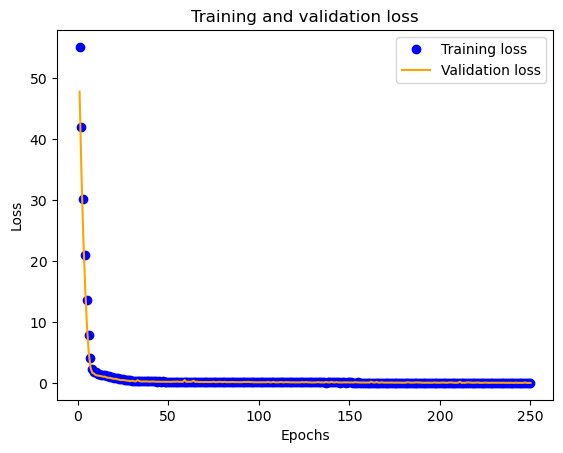

In [192]:
history_dict2 = fit_model2.history
loss_values2 = history_dict2['loss'] # you can change this
val_loss_values2 = history_dict2['val_loss'] # you can also change this
epochs2 = range(1, len(loss_values2) + 1) # range of X (no. of epochs)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 675us/step


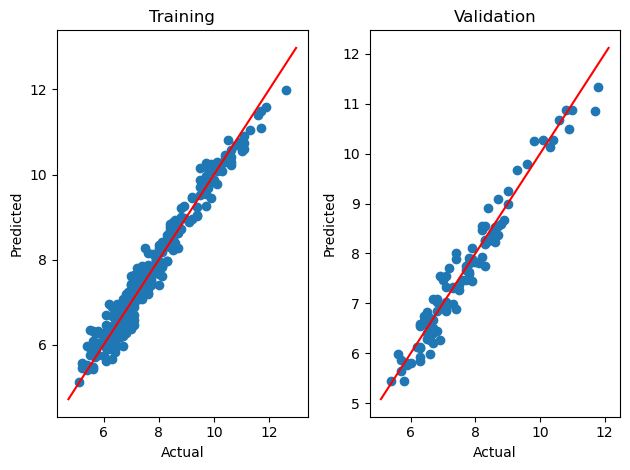

In [193]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=opt2_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=opt2_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [194]:
# metrics
pred = opt2_model.predict(X_test)
pred

trainpreds = opt2_model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

10/10 [==============================] - 0s 778us/step
0.23241227884761623
0.24404291358648558
